In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


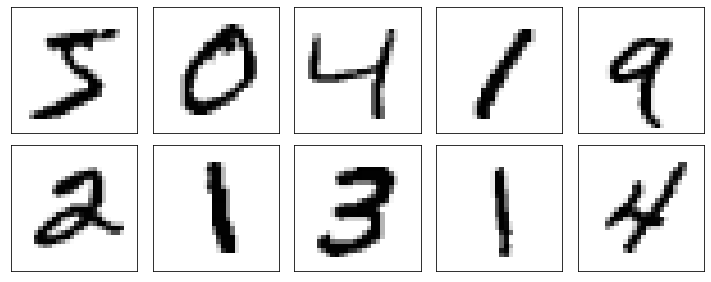

In [4]:
fig,axes=plt.subplots(2, 5,figsize=(10,4))
axes=axes.flatten()
for i in range(10):
    axes[i].imshow(train_images[i],cmap="gray_r")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

# 将原本28*28 images 转换 a 784 vector
x_train = train_images.reshape(60000,784).astype('float32')
x_test = test_images.reshape(10000,784).astype('float32')
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

In [7]:
#查看image图像第0项内容
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [7]:
# 将数字图像images的数字标准化，即normalize input from 0-255 to 0-1
X_train = x_train/255
X_test = x_test/255
#查看数字图像images的数字标准化后的结果
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
print(train_labels[0])

5


In [9]:
#查看训练数据label标签字段的前5项训练数据
print(train_labels[:5])
#将训练数据和测试数据的类别进行one-hot独热编码
from keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)
#查看进行one-hot encoding转换之后label标签字段的前5项训练数据
print(Y_train[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


from keras import models
from keras import layers
#建立模型
model = models.Sequential()
#将输入层与隐藏层加入模型，定义隐藏层神经元个数为784
#设置输入层神经元个数为784
model.add(layers.Dense(units=784,activation='relu',
                         input_dim=784,kernel_initializer='normal'))
#建立输出层，共10个神经元，对应0到9十个数字，使用激活函数softmax
model.add(layers.Dense(units=10,kernel_initializer='normal',
                         activation='softmax'))
print(model.summary())

#用compile方法对训练模型进行设置，设置优化器，损失函数
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#开始训练
train_history=model.fit(X_train,Y_train,
                          epochs=5,batch_size=200,
                          validation_split=0.2,verbose=2)

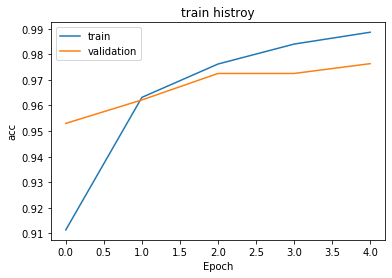

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train histroy')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

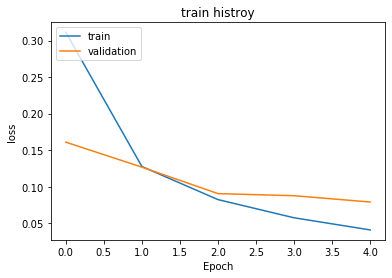

In [14]:
show_train_history(train_history,'loss','val_loss')

#评价模型
test_loss , test_acc = model.evaluate(X_test,Y_test)
#输出精度
print('test_acc:',test_acc)


In [16]:
prediction=model.predict_classes(test_X)
print('测试数据第340项的真实值:',test_labels[340])
print('测试数据第340项的预测值:',prediction[340])
print('测试数据第341项的真实值:',test_labels[341])
print('测试数据第341项的预测值:',prediction[341])
print('测试数据第342项的真实值:',test_labels[342])
print('测试数据第342项的预测值:',prediction[342])

测试数据第340项的真实值: 5
测试数据第340项的预测值: 3
测试数据第341项的真实值: 6
测试数据第341项的预测值: 6
测试数据第342项的真实值: 1
测试数据第342项的预测值: 1


In [17]:
import pandas as pd
pd.crosstab(test_labels,prediction,colnames=['predict'],rownames=['Label'])

predict,0,1,2,3,4,5,6,7,8,9
Label,,,,,,,,,,
0,972,0,1,1,1,0,1,1,3,0
1,0,1122,3,1,0,1,2,0,6,0
2,5,1,1000,3,1,1,2,6,13,0
3,0,0,0,998,0,1,0,4,5,2
4,1,0,1,1,964,0,4,3,2,6
5,4,0,0,8,3,865,4,2,4,2
6,6,3,1,1,4,5,933,0,5,0
7,1,5,8,2,0,0,0,1007,4,1
8,4,0,3,6,5,1,1,4,948,2


In [18]:
df=pd.DataFrame({'label':test_labels,'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2810,5,3
4355,5,3
5937,5,3
5972,5,3
5982,5,3
